# Imports and reading data

Data generated and saved to 'data.csv'.


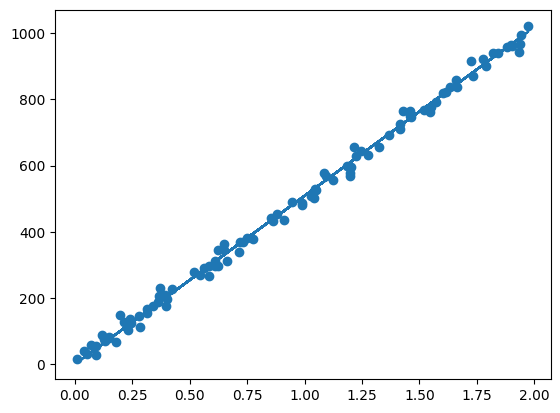

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility (optional)
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate random x values in some range (e.g., 0 to 2)
X = 2 * np.random.rand(n_samples)

# Generate noise (mean 0, with some standard deviation)
noise = np.random.randn(n_samples) * 20.0  # Adjust 50.0 to control noise level

# True relationship: y = 509*x + noise
y = 509 * X + noise

# Create a Pandas DataFrame
df = pd.DataFrame({
    'x': X,
    'y': y
})

pred = df.x * 509

plt.scatter(df.x, df.y)
plt.plot(df.x,pred)


# Save to CSV
df.to_csv('data_lin_reg.csv', index=False)

print("Data generated and saved to 'data.csv'.")


In [7]:
import numpy as np
import pandas as pd
import plotly.express as px

In [4]:
data = pd.read_csv('data_lin_reg.csv')

data.head()

,x,y
0,0.749080,383.022782
1,1.901429,961.847017
2,1.463988,747.005048
3,1.197317,569.682959
4,0.312037,154.433538


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
px.scatter(data, x='x', y='y')

# Loss and risk functions

In [9]:
def l2_loss(y, y_pred):
    """Compute the L2 loss between y and y_pred.
    
    Args:
        y (np.array): the true values
        y_pred (np.array): the predicted values
        
    Returns:
        float: the L2 loss
    """
    return np.sum((y - y_pred) ** 2)

def empirical_risk(y, y_pred):
    """Compute the empirical risk.
    
    Args:
        y (np.array): the true values
        y_pred (np.array): the predicted values
        
    Returns:
        float: the empirical risk
    """
    return l2_loss(y, y_pred) / len(y)

In [10]:
# testing
y = np.array([1, 2, 3])
y_pred = np.array([1, 2, 3])


assert l2_loss(y, y_pred) == 0, f"L2 loss: {l2_loss(y, y_pred)}"
assert empirical_risk(y, y_pred) == 0, f"Empirical risk: {empirical_risk(y, y_pred)}"

y_pred = np.array([1, 2, 4])
assert l2_loss(y, y_pred) == 1, f"L2 loss: {l2_loss(y, y_pred)}"
assert empirical_risk(y, y_pred) == 1/3, f"Empirical risk: {empirical_risk(y, y_pred)}"

# Gradient descent

In [11]:
def predict(x, theta):
    """Predict the values of y given x.
    
    Equation: y = theta * x (theta is a scalar)
    
    Note:
        Just multiplying x by theta is not worth a separate function, but in 
        future we'll have more complex models.
    
    Args:
        x (float)
        theta (float) 
        
    Returns:
        float
    """
    return x * theta

In [ ]:
def gradient_of_empirical_risk(x, y, theta):
    """Compute the gradient of the empirical risk.	
    
    Args:
        x (np.array): the features
        y (np.array): the true values
        theta (float): the parameter
        
    Returns:
        float: the gradient
    """
    predictions = predict(x, theta)
    residuals = predictions - y
    return 2 * np.dot(residuals, x) / len(y)

# testing
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])
theta = 1

grad_zero = gradient_of_empirical_risk(x, y, theta)
assert grad_zero == 0, f"Gradient: {grad_zero}"

AssertionError: Gradient: 114902.66666666667

# Linear Regression

In [15]:
def linear_regression(x, y, learning_rate=0.01, epochs=1000):
    """Perform linear regression.
    
    Note:
        Epoch means 1 full iteration over the dataset.
    
    Args:
        x (np.array): the feature
        y (np.array): the true values
        learning_rate (float): the learning rate / step size (default: 0.01)
        epochs (int): the number of epochs (iterations of grad. descent) (default: 100)
        
    Returns:
        dict: with keys 'results', 'loss', 'theta', 'learning_rate'
    """
    theta = 0 # or maybe random
    
    result_dict = {'epoch': [], 'theta': [], 'risk': [], "all_thetas": []}
    
    for i in range(epochs):
        grad = gradient_of_empirical_risk(x, y, theta)
        theta -= learning_rate * grad
        
        predictions = predict(x, theta)
        risk = empirical_risk(y, predictions)
        
        result_dict['epoch'].append(i)
        result_dict['theta'].append(theta)
        result_dict['risk'].append(risk)
        result_dict['all_thetas'].append(theta)
        
    res_df = pd.DataFrame(result_dict)    
    loss_last_epoch = res_df['risk'].iloc[-1]
    
    results = {'results': res_df, 
               'loss': loss_last_epoch, 
               "theta": theta,
               "all_thetas": result_dict['all_thetas'],
               "learning_rate": learning_rate}
    
    return results

In [16]:
res_df, loss, theta, all_thetas, lr = linear_regression(data["x"], data["y"]).values()


In [ ]:
px.line(all_thetas, title="Theta over epochs")

: 

# Plots

In [71]:
px.line(res_df, x='epoch', y='risk', title=f'Empirical risk over epochs | Learning rate: {lr}')

In [72]:
px.line(res_df, x='epoch', y='theta', title=f'Theta over epochs | Learning rate: {lr}')

# Experiment with different learning rates

In [73]:
learning_rates = [0.001, 0.01, 0.1, 1, 10]

model_comparison = {}

for lr in learning_rates:
    results = linear_regression(data["x"], data["y"], learning_rate=lr)
    
    del results['results']
    
    model_comparison[lr] = results
    
 

c:\Users\hayk_\.conda\envs\100\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning:

overflow encountered in reduce

C:\Users\hayk_\AppData\Local\Temp\ipykernel_11000\2334900103.py:22: RuntimeWarning:

invalid value encountered in scalar subtract



In [83]:
df_comp = pd.DataFrame(model_comparison).T
df_comp.reset_index(inplace=True, drop=True)
df_comp

,loss,theta,learning_rate
0,2593.250102,4.648453e+02,0.001
1,327.886593,5.076786e+02,0.010
2,327.886593,5.076786e+02,0.100
3,inf,-7.395857e+169,1.000
4,0.000000,NaN,10.000


# Best model

In [84]:
# drop NAs
df_comp = df_comp.dropna()

best_model = df_comp[df_comp['loss'] == df_comp['loss'].min()]
best_model

,loss,theta,learning_rate
1,327.886593,507.678556,0.01
2,327.886593,507.678556,0.10


In [86]:
# let's just pick the first one
best_lr = best_model.index[0]
best_theta = best_model['theta'].values[0]

print(f"Best learning rate: {best_lr}")
print(f"Best theta: {best_theta}")

Best learning rate: 1
Best theta: 507.6785561724401


In [89]:
predictions = predict(data['x'], best_theta)

fig = px.scatter(data, x='x', y='y', title='Linear regression')
fig.add_scatter(x=data['x'], y=predictions, mode='lines', name='Predictions')

theta_true = 509
fig.add_scatter(x=data['x'], y=data['x'] * theta_true, mode='lines', name='True line')


# Notes

- Big learning rates result in divergence
- Small learning rate may need more iterations to converge
- 0.01 and 0.1 are good learning rates for this problem, we see that algorithm converges. If we had implemented stopping criteria (e.g. stop when the change in loss is less than a threshold), we could have stopped the algorithm earlier, and preferred 0.1 learning rate (for faster stopping).
- In practice we will split the data into 2 or 3 parts and give only one of the parts to the model to learn from
- Here best theta is 507, although when generating the dataset I used 509. This is because of the added noise in the data.